#                                                 Team 15
Akhil Kaundinya Metlakunta -002959252

Prathik Reddy Arasu-002921582

Dhaval Minesh Patel-001566811

# Analysing and Predicting What factors affect in the final position of the teams in Premier League

# Importing all the required Libraries

In [143]:
import pandas as pd
import numpy as np
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import os
import codecs, json
import tempfile
import requests
import base64
import sklearn
import scipy
import seaborn as sns
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from matplotlib.backends.backend_agg import FigureCanvas
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Dataset

The dataset contains the stats and the results of all premier League Clubs from 2006-2018. There are two data sets:-

1) results.csv: This dataset contains result of every single match of all teams in EPL based on season

2) stats_epl.csv: This dataset contains Statsistical Performance of every single match of all teams in EPL based on season

In [144]:
#reading the csv file 
filtered_df = pd.read_csv("/Users/akhil_kaundinya/DS/EPL/results.csv",encoding='windows-1254')
stats_epl = pd.read_csv('stats.csv')

In [145]:
filtered_df.head()

Season              DateTime         HomeTeam             AwayTeam  FTHG  \
0  1993-94  1993-08-14T00:00:00Z          Arsenal             Coventry     0   
1  1993-94  1993-08-14T00:00:00Z      Aston Villa  Queens Park Rangers     4   
2  1993-94  1993-08-14T00:00:00Z          Chelsea     Blackburn Rovers     1   
3  1993-94  1993-08-14T00:00:00Z        Liverpool       Sheffield Weds     2   
4  1993-94  1993-08-14T00:00:00Z  Manchester City                Leeds     1   

   FTAG FTR  HTHG  HTAG  HTR  ... HST  AST  HC  AC  HF  AF  HY  AY  HR  AR  
0     3   A   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1     1   H   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2     2   A   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
3     0   H   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
4     1   D   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 23 columns]

In [146]:
stats_epl.head()

team  wins  losses  goals  total_yel_card  total_red_card  \
0  Manchester United  28.0     5.0   83.0            60.0             1.0   
1            Chelsea  24.0     3.0   64.0            62.0             4.0   
2          Liverpool  20.0    10.0   57.0            44.0             0.0   
3            Arsenal  19.0     8.0   63.0            59.0             3.0   
4  Tottenham Hotspur  17.0    12.0   57.0            48.0             3.0   

   total_scoring_att  ontarget_scoring_att  hit_woodwork  att_hd_goal  ...  \
0              698.0                 256.0          21.0         12.0  ...   
1              636.0                 216.0          14.0         16.0  ...   
2              668.0                 214.0          15.0          8.0  ...   
3              638.0                 226.0          19.0         10.0  ...   
4              520.0                 184.0           6.0          5.0  ...   

   total_cross  corner_taken  touches  big_chance_missed  clearance_off_line  \
0        918.0         258.0  25686.0                NaN                 1.0   
1        897.0         231.0  24010.0                NaN                 2.0   
2       1107.0         282.0  24150.0                NaN                 1.0   
3        873.0         278.0  25592.0                NaN                 1.0   
4        796.0         181.0  22200.0                NaN                 2.0   

   dispossessed  penalty_save  total_high_claim  punches     season  
0           NaN           2.0              37.0     25.0  2006-2007  
1           NaN           1.0              74.0     22.0  2006-2007  
2           NaN           0.0              51.0     27.0  2006-2007  
3           NaN           0.0              88.0     27.0  2006-2007  
4           NaN           0.0              51.0     24.0  2006-2007  

[5 rows x 42 columns]

# Data Cleaning

In [147]:
#Removing the unwanted rows
filtered_df = filtered_df.iloc[5484:9664 , :]
filtered_df.to_csv("/Users/akhil_kaundinya/DS/EPL/final_results_epl.csv", index=False)
stats_epl = stats_epl.iloc[20: , :]
stats_epl.to_csv("/Users/akhil_kaundinya/DS/EPL/final_stats_epl.csv", index=False)

In [148]:
stats_epl.head()

team  wins  losses  goals  total_yel_card  total_red_card  \
20  Manchester United  27.0     5.0   80.0            51.0             2.0   
21            Chelsea  25.0     3.0   65.0            63.0             5.0   
22            Arsenal  24.0     3.0   74.0            55.0             3.0   
23          Liverpool  21.0     4.0   67.0            45.0             1.0   
24            Everton  19.0    11.0   55.0            40.0             3.0   

    total_scoring_att  ontarget_scoring_att  hit_woodwork  att_hd_goal  ...  \
20              696.0                 260.0          16.0         12.0  ...   
21              605.0                 199.0          12.0         10.0  ...   
22              627.0                 208.0          13.0         14.0  ...   
23              686.0                 214.0          13.0          7.0  ...   
24              474.0                 169.0           4.0         13.0  ...   

    total_cross  corner_taken  touches  big_chance_missed  clearance_off_line  \
20        936.0         261.0  26620.0                NaN                10.0   
21        945.0         253.0  26290.0                NaN                 8.0   
22        888.0         234.0  28156.0                NaN                 2.0   
23        932.0         237.0  25857.0                NaN                 4.0   
24        877.0         198.0  21360.0                NaN                 8.0   

    dispossessed  penalty_save  total_high_claim  punches     season  
20         627.0           0.0              47.0     23.0  2007-2008  
21         687.0           0.0              62.0     19.0  2007-2008  
22         776.0           1.0              45.0     26.0  2007-2008  
23         613.0           1.0              42.0     22.0  2007-2008  
24         620.0           0.0              55.0     20.0  2007-2008  

[5 rows x 42 columns]

In [149]:
#Checing for null values
filtered_df.isnull().sum()


Season      0
DateTime    0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HF          0
AF          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [150]:
#to drop the duplicates
totth_name = stats_epl.team.drop_duplicates().tolist()[12]
totth_name

'Tottenham Hotspur'

# Exploratory Data Analysis

Finding total wins, losses and draws of different team based on total matches

In [151]:
#Creating two new columns 
#Draws
stats_epl['draws'] = 38 - stats_epl['wins'] - stats_epl['losses']
#Total Matches
stats_epl['total_matches'] = stats_epl['wins'] + stats_epl['losses'] + stats_epl['draws']

In [152]:
# find the total wins, losses, draws, total_matches of different teams
epl = stats_epl.groupby('team').agg({'wins':'sum', 'losses':'sum','goals':'sum', 'draws':'sum', 'total_matches':'sum'})
# Getting the top 5 teams by sorting
epl_w = epl.sort_values(by = 'wins', ascending = False)
print("Therefore we can learly see that Manchester United has won most matches")
epl_w

Therefore we can learly see that Manchester United has won most matches


wins  losses  goals  draws  total_matches
team                                                                
Manchester United         262.0    72.0  784.0   84.0          418.0
Chelsea                   252.0    76.0  795.0   90.0          418.0
Manchester City           245.0    89.0  837.0   84.0          418.0
Arsenal                   236.0    86.0  798.0   96.0          418.0
Liverpool                 214.0    93.0  760.0  111.0          418.0
Tottenham Hotspur         211.0   104.0  707.0  103.0          418.0
Everton                   170.0   120.0  600.0  128.0          418.0
Stoke City                116.0   155.0  398.0  109.0          380.0
West Ham United           115.0   160.0  463.0  105.0          380.0
Newcastle United          105.0   154.0  408.0   83.0          342.0
Aston Villa               102.0   140.0  406.0  100.0          342.0
Sunderland                 95.0   181.0  398.0  104.0          380.0
West Bromwich Albion       93.0   154.0  379.0   95.0          342.0
Swansea City               82.0   118.0  306.0   66.0          266.0
Fulham                     79.0   113.0  303.0   74.0          266.0
Southampton                79.0    84.0  294.0   65.0          228.0
Wigan Athletic             60.0   106.0  234.0   62.0          228.0
Crystal Palace             60.0    90.0  214.0   40.0          190.0
Leicester City             58.0    55.0  218.0   39.0          152.0
Blackburn Rovers           57.0    81.0  225.0   52.0          190.0
Bolton Wanderers           52.0    95.0  217.0   43.0          190.0
Hull City                  41.0   101.0  181.0   48.0          190.0
Burnley                    40.0    75.0  145.0   37.0          152.0
Norwich City               39.0    72.0  160.0   41.0          152.0
Watford                    34.0    56.0  124.0   24.0          114.0
AFC Bournemouth            34.0    50.0  145.0   30.0          114.0
Portsmouth                 33.0    54.0  120.0   27.0          114.0
Birmingham City            29.0    48.0  121.0   37.0          114.0
Wolverhampton Wanderers    25.0    61.0  118.0   28.0          114.0
Queens Park Rangers        22.0    66.0  115.0   26.0          114.0
Middlesbrough              22.0    56.0   98.0   36.0          114.0
Reading                    16.0    44.0   84.0   16.0           76.0
Blackpool                  10.0    19.0   55.0    9.0           38.0
Huddersfield Town           9.0    19.0   28.0   10.0           38.0
Brighton and Hove Albion    9.0    16.0   34.0   13.0           38.0
Cardiff City                7.0    22.0   32.0    9.0           38.0
Derby County                1.0    29.0   20.0    8.0           38.0

In [153]:
#fTop 5 teams with most losses
epl_l = epl.sort_values(by = 'losses', ascending = False)
print("Therefore we can learly see that West Ham United has lost most matches")
epl_l.head(5)

Therefore we can learly see that West Ham United has lost most matches


wins  losses  goals  draws  total_matches
team                                                            
Sunderland             95.0   181.0  398.0  104.0          380.0
West Ham United       115.0   160.0  463.0  105.0          380.0
Stoke City            116.0   155.0  398.0  109.0          380.0
Newcastle United      105.0   154.0  408.0   83.0          342.0
West Bromwich Albion   93.0   154.0  379.0   95.0          342.0

In [154]:
#Finding top 10 teams with highest on target scoring chances 
epl_on_target = stats_epl.groupby('team').agg({'total_scoring_att':'sum', 'ontarget_scoring_att':'sum'})
epl_on_target = epl_on_target.sort_values(by = 'total_scoring_att', ascending = False)
epl_on_target.head(10)

total_scoring_att  ontarget_scoring_att
team                                                      
Chelsea                       7246.0                2451.0
Liverpool                     7200.0                2392.0
Tottenham Hotspur             6885.0                2348.0
Manchester City               6721.0                2355.0
Arsenal                       6701.0                2426.0
Manchester United             6502.0                2274.0
Everton                       5688.0                1933.0
West Ham United               4967.0                1574.0
Sunderland                    4532.0                1402.0
Newcastle United              4349.0                1399.0

Plotting a graph between shots on target and total number if chances created 

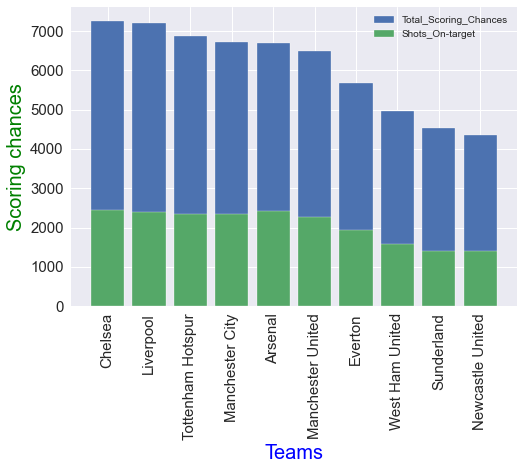

In [155]:
teams = epl_on_target.index[:10]
scoring_chances = epl_on_target.total_scoring_att[:10]
ontarget = epl_on_target.ontarget_scoring_att[:10]
plt.style.use('seaborn')
plt.bar(teams, scoring_chances, label = 'Total_Scoring_Chances')
plt.bar(teams, ontarget, label = 'Shots_On-target')
plt.xlabel('Teams', size = 20, color = 'Blue')
plt.ylabel('Scoring chances', size = 20, color = 'Green')
plt.xticks(rotation = 'vertical', size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

In [156]:
#All the football clubs who have played atleast one game in EPL through 2007-2018.
epl_team_list = stats_epl.team.drop_duplicates().tolist()
print('There are total '+ str(len(epl_team_list)) + ' teams are available')
i=0
for t in epl_team_list:
    i=i+1
    print(str(i)+' team is '+t)
    if i==18:
        print('...')
        break
print('The ' + str(len(epl_team_list)) + ' is '+ epl_team_list[-1])

There are total 37 teams are available
1 team is Manchester United
2 team is Chelsea
3 team is Arsenal
4 team is Liverpool
5 team is Everton
6 team is Aston Villa
7 team is Portsmouth
8 team is Blackburn Rovers
9 team is Manchester City
10 team is West Ham United
11 team is Newcastle United
12 team is Sunderland
13 team is Tottenham Hotspur
14 team is Middlesbrough
15 team is Reading
16 team is Wigan Athletic
17 team is Bolton Wanderers
18 team is Birmingham City
...
The 37 is Huddersfield Town


In [157]:
epl_team_list

['Manchester United',
 'Chelsea',
 'Arsenal',
 'Liverpool',
 'Everton',
 'Aston Villa',
 'Portsmouth',
 'Blackburn Rovers',
 'Manchester City',
 'West Ham United',
 'Newcastle United',
 'Sunderland',
 'Tottenham Hotspur',
 'Middlesbrough',
 'Reading',
 'Wigan Athletic',
 'Bolton Wanderers',
 'Birmingham City',
 'Fulham',
 'Derby County',
 'Stoke City',
 'Hull City',
 'West Bromwich Albion',
 'Wolverhampton Wanderers',
 'Burnley',
 'Blackpool',
 'Norwich City',
 'Swansea City',
 'Queens Park Rangers',
 'Southampton',
 'Crystal Palace',
 'Cardiff City',
 'Leicester City',
 'Watford',
 'AFC Bournemouth',
 'Brighton and Hove Albion',
 'Huddersfield Town']

In [158]:
# sorting and finding only spurs data 
filtered_df = filtered_df[(filtered_df['HomeTeam'] == totth_name) | (filtered_df['AwayTeam'] == totth_name)]
filtered_df.to_csv("/Users/akhil_kaundinya/DS/EPL/results_epl_tottenham.csv", index=False)
filtered_df

Season              DateTime                  HomeTeam  \
5489  2007-08  2007-08-11T00:00:00Z                Sunderland   
5494  2007-08  2007-08-14T00:00:00Z         Tottenham Hotspur   
5506  2007-08  2007-08-18T00:00:00Z         Tottenham Hotspur   
5519  2007-08  2007-08-26T00:00:00Z         Manchester United   
5522  2007-08  2007-09-01T00:00:00Z                    Fulham   
...       ...                   ...                       ...   
9618  2017-18  2018-04-17T00:00:00Z  Brighton and Hove Albion   
9637  2017-18  2018-04-30T00:00:00Z         Tottenham Hotspur   
9644  2017-18  2018-05-05T00:00:00Z      West Bromwich Albion   
9652  2017-18  2018-05-09T00:00:00Z         Tottenham Hotspur   
9662  2017-18  2018-05-13T00:00:00Z         Tottenham Hotspur   

               AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  ...   HST   AST   HC  \
5489  Tottenham Hotspur     1     0   H   0.0   0.0   D  ...   4.0   3.0  7.0   
5494            Everton     1     3   A   1.0   3.0   A  ...   8.0  10.0  9.0   
5506              Derby     4     0   H   3.0   0.0   H  ...  14.0   2.0  9.0   
5519  Tottenham Hotspur     1     0   H   0.0   0.0   D  ...   5.0   3.0  4.0   
5522  Tottenham Hotspur     3     3   D   1.0   2.0   A  ...   7.0   8.0  6.0   
...                 ...   ...   ...  ..   ...   ...  ..  ...   ...   ...  ...   
9618  Tottenham Hotspur     1     1   D   0.0   0.0   D  ...   5.0   6.0  3.0   
9637            Watford     2     0   H   1.0   0.0   H  ...   3.0   5.0  4.0   
9644  Tottenham Hotspur     1     0   H   0.0   0.0   D  ...   1.0   5.0  5.0   
9652   Newcastle United     1     0   H   0.0   0.0   D  ...   7.0   3.0  6.0   
9662     Leicester City     5     4   H   1.0   2.0   A  ...   6.0   9.0  4.0   

        AC    HF    AF   HY   AY   HR   AR  
5489   2.0  14.0  14.0  1.0  1.0  0.0  0.0  
5494   4.0  16.0   9.0  2.0  0.0  0.0  0.0  
5506   3.0   8.0  14.0  0.0  4.0  0.0  0.0  
5519   4.0  15.0   7.0  2.0  3.0  0.0  0.0  
5522  14.0  13.0  11.0  1.0  0.0  0.0  0.0  
...    ...   ...   ...  ...  ...  ...  ...  
9618   4.0   6.0   5.0  1.0  0.0  0.0  0.0  
9637   0.0  11.0  10.0  1.0  0.0  0.0  0.0  
9644   9.0  13.0  12.0  4.0  1.0  0.0  0.0  
9652   4.0  10.0   8.0  2.0  3.0  0.0  0.0  
9662   4.0   9.0  13.0  1.0  2.0  0.0  0.0  

[418 rows x 23 columns]

In [159]:
#viewing all seasons in EPL
all_epl_season = filtered_df.Season.drop_duplicates().tolist()
i=0
for s in all_epl_season:
    i=i+1
    print(str(i) + ' season is ' + s)

1 season is 2007-08
2 season is 2008-09
3 season is 2009-10
4 season is 2010-11
5 season is 2011-12
6 season is 2012-13
7 season is 2013-14
8 season is 2014-15
9 season is 2015-16
10 season is 2016-17
11 season is 2017-18


In [160]:
#to calculate number of matches
NUM_MATCHES = []
for s in all_epl_season:
    NUM_MATCHES.append(len(filtered_df[filtered_df['Season']==s]))

In [161]:
#Calculating Number of matches played by each teamin entire season
c=0
for num in NUM_MATCHES:
    if num==NUM_MATCHES[0]:
        c=c+1
if c==len(NUM_MATCHES):
    print('In all the seasons ' + str(NUM_MATCHES[0]) + ' matches are played by each team')

In all the seasons 38 matches are played by each team


In [162]:
#adding final position in epl
P = [11,8,4,5,4,5,6,5,3,2,3]
P_df = []
for p in P:
    new_p = [p]*38
    P_df.append(new_p)
new_P_df=[]
for p in P_df:
    for i in p:
        new_P_df.append(i)
filtered_df['Target'] = new_P_df

Checking the performance of the Tottenham when they are at home and when they are away

# Calculating Home vs Away winning

By this plot we can say that Tottenham had most wins when they were at home.They won more than 120 games


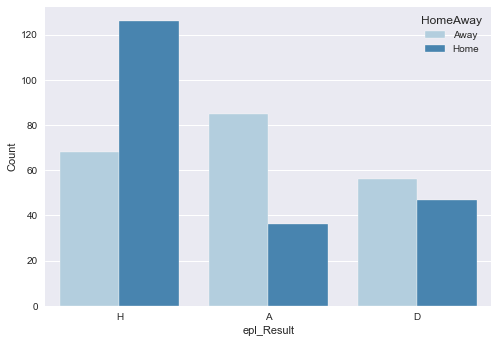

In [163]:
filtered_df = filtered_df .reset_index(drop=True)
Home = filtered_df[filtered_df['HomeTeam']==totth_name].index.tolist()
H_A = []
for i in range(len(filtered_df)):
    if i in Home:
        H_A.append('Home')
    else:
        H_A.append('Away')
filtered_df['HomeAway'] = H_A
plt.grid(True)
sns.countplot(filtered_df.FTR, hue = filtered_df.HomeAway, palette='Blues')
plt.xlabel('epl_Result')
plt.ylabel('Count')
print("By this plot we can say that Tottenham had most wins when they were at home.They won more than 120 games")

# Simillarly, lets assume for all the teams

So therefore, We can clearly see that winning at home is comparitvly easy when compared to away


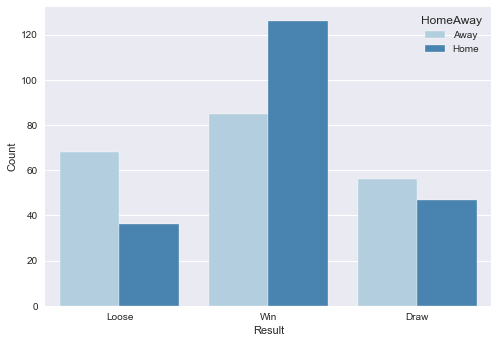

In [164]:
WDL=[]
for r in range(len(filtered_df)):
    line = filtered_df.loc[r]
    if line['FTR'] == 'D':
        WDL.append('Draw')
    elif line['FTR'] == 'H':
        if line['HomeAway'] == 'Home':
            WDL.append('Win')
        else:
            WDL.append('Loose')
    else:
        if line['HomeAway'] == 'Home':
            WDL.append('Loose')
        else:
            WDL.append('Win')
        
#Strange stuff here:
#Let's make it clearer
filtered_df['new_FTR'] = WDL
plt.grid(True)
sns.countplot(filtered_df.new_FTR, hue = filtered_df.HomeAway, palette='Blues')
plt.xlabel('Result')
plt.ylabel('Count')
print("So therefore, We can clearly see that winning at home is comparitvly easy when compared to away")

In [165]:
filtered_df = filtered_df.drop(columns=['FTR'])


In [166]:
filtered_df

Season              DateTime                  HomeTeam  \
0    2007-08  2007-08-11T00:00:00Z                Sunderland   
1    2007-08  2007-08-14T00:00:00Z         Tottenham Hotspur   
2    2007-08  2007-08-18T00:00:00Z         Tottenham Hotspur   
3    2007-08  2007-08-26T00:00:00Z         Manchester United   
4    2007-08  2007-09-01T00:00:00Z                    Fulham   
..       ...                   ...                       ...   
413  2017-18  2018-04-17T00:00:00Z  Brighton and Hove Albion   
414  2017-18  2018-04-30T00:00:00Z         Tottenham Hotspur   
415  2017-18  2018-05-05T00:00:00Z      West Bromwich Albion   
416  2017-18  2018-05-09T00:00:00Z         Tottenham Hotspur   
417  2017-18  2018-05-13T00:00:00Z         Tottenham Hotspur   

              AwayTeam  FTHG  FTAG  HTHG  HTAG HTR      Referee  ...    AC  \
0    Tottenham Hotspur     1     0   0.0   0.0   D      A Wiley  ...   2.0   
1              Everton     1     3   1.0   3.0   A     M Halsey  ...   4.0   
2                Derby     4     0   3.0   0.0   H        C Foy  ...   3.0   
3    Tottenham Hotspur     1     0   0.0   0.0   D       H Webb  ...   4.0   
4    Tottenham Hotspur     3     3   1.0   2.0   A      M Riley  ...  14.0   
..                 ...   ...   ...   ...   ...  ..          ...  ...   ...   
413  Tottenham Hotspur     1     1   0.0   0.0   D     K Friend  ...   4.0   
414            Watford     2     0   1.0   0.0   H     M Oliver  ...   0.0   
415  Tottenham Hotspur     1     0   0.0   0.0   D      M Jones  ...   9.0   
416   Newcastle United     1     0   0.0   0.0   D  N Swarbrick  ...   4.0   
417     Leicester City     5     4   1.0   2.0   A     C Pawson  ...   4.0   

       HF    AF   HY   AY   HR   AR  Target  HomeAway  new_FTR  
0    14.0  14.0  1.0  1.0  0.0  0.0      11      Away    Loose  
1    16.0   9.0  2.0  0.0  0.0  0.0      11      Home    Loose  
2     8.0  14.0  0.0  4.0  0.0  0.0      11      Home      Win  
3    15.0   7.0  2.0  3.0  0.0  0.0      11      Away    Loose  
4    13.0  11.0  1.0  0.0  0.0  0.0      11      Away     Draw  
..    ...   ...  ...  ...  ...  ...     ...       ...      ...  
413   6.0   5.0  1.0  0.0  0.0  0.0       3      Away     Draw  
414  11.0  10.0  1.0  0.0  0.0  0.0       3      Home      Win  
415  13.0  12.0  4.0  1.0  0.0  0.0       3      Away    Loose  
416  10.0   8.0  2.0  3.0  0.0  0.0       3      Home      Win  
417   9.0  13.0  1.0  2.0  0.0  0.0       3      Home      Win  

[418 rows x 25 columns]

In [167]:
filtered_df = filtered_df.rename(columns={'new_FTR':'result'})
filtered_df

Season              DateTime                  HomeTeam  \
0    2007-08  2007-08-11T00:00:00Z                Sunderland   
1    2007-08  2007-08-14T00:00:00Z         Tottenham Hotspur   
2    2007-08  2007-08-18T00:00:00Z         Tottenham Hotspur   
3    2007-08  2007-08-26T00:00:00Z         Manchester United   
4    2007-08  2007-09-01T00:00:00Z                    Fulham   
..       ...                   ...                       ...   
413  2017-18  2018-04-17T00:00:00Z  Brighton and Hove Albion   
414  2017-18  2018-04-30T00:00:00Z         Tottenham Hotspur   
415  2017-18  2018-05-05T00:00:00Z      West Bromwich Albion   
416  2017-18  2018-05-09T00:00:00Z         Tottenham Hotspur   
417  2017-18  2018-05-13T00:00:00Z         Tottenham Hotspur   

              AwayTeam  FTHG  FTAG  HTHG  HTAG HTR      Referee  ...    AC  \
0    Tottenham Hotspur     1     0   0.0   0.0   D      A Wiley  ...   2.0   
1              Everton     1     3   1.0   3.0   A     M Halsey  ...   4.0   
2                Derby     4     0   3.0   0.0   H        C Foy  ...   3.0   
3    Tottenham Hotspur     1     0   0.0   0.0   D       H Webb  ...   4.0   
4    Tottenham Hotspur     3     3   1.0   2.0   A      M Riley  ...  14.0   
..                 ...   ...   ...   ...   ...  ..          ...  ...   ...   
413  Tottenham Hotspur     1     1   0.0   0.0   D     K Friend  ...   4.0   
414            Watford     2     0   1.0   0.0   H     M Oliver  ...   0.0   
415  Tottenham Hotspur     1     0   0.0   0.0   D      M Jones  ...   9.0   
416   Newcastle United     1     0   0.0   0.0   D  N Swarbrick  ...   4.0   
417     Leicester City     5     4   1.0   2.0   A     C Pawson  ...   4.0   

       HF    AF   HY   AY   HR   AR  Target  HomeAway  result  
0    14.0  14.0  1.0  1.0  0.0  0.0      11      Away   Loose  
1    16.0   9.0  2.0  0.0  0.0  0.0      11      Home   Loose  
2     8.0  14.0  0.0  4.0  0.0  0.0      11      Home     Win  
3    15.0   7.0  2.0  3.0  0.0  0.0      11      Away   Loose  
4    13.0  11.0  1.0  0.0  0.0  0.0      11      Away    Draw  
..    ...   ...  ...  ...  ...  ...     ...       ...     ...  
413   6.0   5.0  1.0  0.0  0.0  0.0       3      Away    Draw  
414  11.0  10.0  1.0  0.0  0.0  0.0       3      Home     Win  
415  13.0  12.0  4.0  1.0  0.0  0.0       3      Away   Loose  
416  10.0   8.0  2.0  3.0  0.0  0.0       3      Home     Win  
417   9.0  13.0  1.0  2.0  0.0  0.0       3      Home     Win  

[418 rows x 25 columns]

Therefore, we can say that tottenham win percentage at home is around 60% 


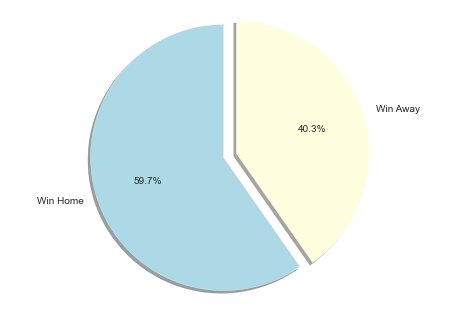

In [169]:
Win_Home = len(filtered_df[(filtered_df['result']=='Win') & (filtered_df['HomeAway']=='Home')])
Win_Away = len(filtered_df[(filtered_df['result']=='Win') & (filtered_df['HomeAway']=='Away')])
labels = 'Win Home', 'Win Away'
sizes = [Win_Home, Win_Away]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['lightblue','lightyellow'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
print('Therefore, we can say that tottenham win percentage at home is around 60% ')
plt.show()

lets say what happens with other clubs

In [170]:
def get_percentage(team_name):
    all_home_wins = pd.read_csv('results_epl_1.csv')
    all_home_wins= all_home_wins[(all_home_wins['HomeTeam'] == team_name) | (all_home_wins['AwayTeam'] == team_name)]
    print(all_home_wins)
    all_home_wins = all_home_wins.reset_index()
    HOME = all_home_wins[all_home_wins['HomeTeam']==team_name].index.tolist()
    H_A = []
    for i in range(len(all_home_wins)):
        if i in HOME:
            H_A.append('Home')
        else:
            H_A.append('Away')
    all_home_wins['HomeAway'] = H_A
    WDL=[]
    for r in range(len(all_home_wins)):
        line = all_home_wins.loc[r]
        if line['FTR'] == 'D':
            WDL.append('Draw')
        elif line['FTR'] == 'H':
            if line['HomeAway'] == 'Home':
                WDL.append('Win')
            else:
                WDL.append('Loose')
        else:
            if line['HomeAway'] == 'Home':
                WDL.append('Loose')
            else:
                WDL.append('Win')
    all_home_wins.drop(columns=['FTR'])
    all_home_wins['FTR'] = WDL
    #print('value is'+str((filtered_df)))
    Win_Home = len(all_home_wins[(all_home_wins['FTR']=='Win') & (all_home_wins['HomeAway']=='Home')])
    print('This is the value'+str(Win_Home))
    Win_Away = len(all_home_wins[(all_home_wins['FTR']=='Win') & (all_home_wins['HomeAway']=='Away')])
    all_home_wins.to_csv("/Users/akhil_kaundinya/DS/EPL/all_home_wins.csv", index=False)
    print(all_home_wins)
    PERC_HOME = (Win_Home)*100/(Win_Home+Win_Away)
    return (PERC_HOME)


In [171]:
percentages=[]
for t in epl_team_list:
    print("sjfjhsdgfjhd" +t)
    percentages.append(get_percentage(t))

sjfjhsdgfjhdManchester United
       Season              DateTime                  HomeTeam  \
9     2006-07  2006-08-20T00:00:00Z         Manchester United   
14    2006-07  2006-08-23T00:00:00Z         Charlton Athletic   
23    2006-07  2006-08-26T00:00:00Z                   Watford   
32    2006-07  2006-09-09T00:00:00Z         Manchester United   
45    2006-07  2006-09-17T00:00:00Z         Manchester United   
...       ...                   ...                       ...   
4515  2017-18  2018-04-18T00:00:00Z           AFC Bournemouth   
4531  2017-18  2018-04-29T00:00:00Z         Manchester United   
4534  2017-18  2018-05-04T00:00:00Z  Brighton and Hove Albion   
4549  2017-18  2018-05-10T00:00:00Z           West Ham United   
4554  2017-18  2018-05-13T00:00:00Z         Manchester United   

               AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  ... HST  AST  HC  AC  \
9                Fulham     5     1   H     4     1   H  ...   7    8   5   2   
14    Manchester United    

This is the value136
     index   Season              DateTime              HomeTeam  \
0        0  2006-07  2006-08-19T00:00:00Z      Sheffield United   
1       20  2006-07  2006-08-26T00:00:00Z             Liverpool   
2       31  2006-07  2006-09-09T00:00:00Z               Everton   
3       44  2006-07  2006-09-17T00:00:00Z               Chelsea   
4       48  2006-07  2006-09-20T00:00:00Z             Liverpool   
..     ...      ...                   ...                   ...   
451   4507  2017-18  2018-04-14T00:00:00Z             Liverpool   
452   4519  2017-18  2018-04-21T00:00:00Z  West Bromwich Albion   
453   4527  2017-18  2018-04-28T00:00:00Z             Liverpool   
454   4542  2017-18  2018-05-06T00:00:00Z               Chelsea   
455   4553  2017-18  2018-05-13T00:00:00Z             Liverpool   

                     AwayTeam  FTHG  FTAG    FTR  HTHG  HTAG  ... AST HC  AC  \
0                   Liverpool     1     1   Draw     0     0  ...   7  0  12   
1             

This is the value156
     index   Season              DateTime          HomeTeam  \
0        8  2006-07  2006-08-20T00:00:00Z           Chelsea   
1       16  2006-07  2006-08-23T00:00:00Z   Manchester City   
2       21  2006-07  2006-08-26T00:00:00Z   Manchester City   
3       37  2006-07  2006-09-11T00:00:00Z           Reading   
4       43  2006-07  2006-09-17T00:00:00Z  Blackburn Rovers   
..     ...      ...                   ...               ...   
451   4521  2017-18  2018-04-22T00:00:00Z   Manchester City   
452   4532  2017-18  2018-04-29T00:00:00Z   West Ham United   
453   4543  2017-18  2018-05-06T00:00:00Z   Manchester City   
454   4547  2017-18  2018-05-09T00:00:00Z   Manchester City   
455   4556  2017-18  2018-05-13T00:00:00Z       Southampton   

                     AwayTeam  FTHG  FTAG    FTR  HTHG  HTAG  ... AST  HC  AC  \
0             Manchester City     3     0  Loose     2     0  ...   2   5   2   
1                  Portsmouth     0     0   Draw     0     0

This is the value26
     index   Season              DateTime          HomeTeam         AwayTeam  \
0        6  2006-07  2006-08-19T00:00:00Z           Reading    Middlesbrough   
1       17  2006-07  2006-08-23T00:00:00Z     Middlesbrough          Chelsea   
2       27  2006-07  2006-08-28T00:00:00Z     Middlesbrough       Portsmouth   
3       28  2006-07  2006-09-09T00:00:00Z           Arsenal    Middlesbrough   
4       38  2006-07  2006-09-16T00:00:00Z  Bolton Wanderers    Middlesbrough   
..     ...      ...                   ...               ...              ...   
147   4132  2016-17  2017-04-26T00:00:00Z     Middlesbrough       Sunderland   
148   4141  2016-17  2017-04-30T00:00:00Z     Middlesbrough  Manchester City   
149   4153  2016-17  2017-05-08T00:00:00Z           Chelsea    Middlesbrough   
150   4159  2016-17  2017-05-13T00:00:00Z     Middlesbrough      Southampton   
151   4175  2016-17  2017-05-21T00:00:00Z         Liverpool    Middlesbrough   

     FTHG  FTAG    

This is the value81
     index   Season              DateTime          HomeTeam        AwayTeam  \
0      761  2008-09  2008-08-16T00:00:00Z  Bolton Wanderers      Stoke City   
1      774  2008-09  2008-08-23T00:00:00Z        Stoke City     Aston Villa   
2      784  2008-09  2008-08-30T00:00:00Z     Middlesbrough      Stoke City   
3      797  2008-09  2008-09-14T00:00:00Z        Stoke City         Everton   
4      801  2008-09  2008-09-20T00:00:00Z         Liverpool      Stoke City   
..     ...      ...                   ...               ...             ...   
375   4513  2017-18  2018-04-16T00:00:00Z   West Ham United      Stoke City   
376   4522  2017-18  2018-04-22T00:00:00Z        Stoke City         Burnley   
377   4527  2017-18  2018-04-28T00:00:00Z         Liverpool      Stoke City   
378   4538  2017-18  2018-05-05T00:00:00Z        Stoke City  Crystal Palace   
379   4557  2017-18  2018-05-13T00:00:00Z      Swansea City      Stoke City   

     FTHG  FTAG    FTR  HTHG  H

     index   Season              DateTime         HomeTeam  \
0     1908  2011-12  2011-08-15T00:00:00Z  Manchester City   
1     1914  2011-12  2011-08-20T00:00:00Z     Swansea City   
2     1923  2011-12  2011-08-27T00:00:00Z     Swansea City   
3     1929  2011-12  2011-09-10T00:00:00Z          Arsenal   
4     1943  2011-12  2011-09-17T00:00:00Z     Swansea City   
..     ...      ...                   ...              ...   
261   4521  2017-18  2018-04-22T00:00:00Z  Manchester City   
262   4530  2017-18  2018-04-28T00:00:00Z     Swansea City   
263   4535  2017-18  2018-05-05T00:00:00Z  AFC Bournemouth   
264   4544  2017-18  2018-05-08T00:00:00Z     Swansea City   
265   4557  2017-18  2018-05-13T00:00:00Z     Swansea City   

                 AwayTeam  FTHG  FTAG    FTR  HTHG  HTAG  ... AST  HC  AC  HF  \
0            Swansea City     4     0  Loose     0     0  ...   5   7   4   9   
1          Wigan Athletic     0     0   Draw     0     0  ...   4   7   7   8   
2           

[38 rows x 25 columns]
sjfjhsdgfjhdHuddersfield Town
       Season              DateTime                  HomeTeam  \
4183  2017-18  2017-08-12T00:00:00Z            Crystal Palace   
4197  2017-18  2017-08-20T00:00:00Z         Huddersfield Town   
4202  2017-18  2017-08-26T00:00:00Z         Huddersfield Town   
4219  2017-18  2017-09-11T00:00:00Z           West Ham United   
4222  2017-18  2017-09-16T00:00:00Z         Huddersfield Town   
4230  2017-18  2017-09-23T00:00:00Z                   Burnley   
4242  2017-18  2017-09-30T00:00:00Z         Huddersfield Town   
4254  2017-18  2017-10-14T00:00:00Z              Swansea City   
4262  2017-18  2017-10-21T00:00:00Z         Huddersfield Town   
4273  2017-18  2017-10-28T00:00:00Z                 Liverpool   
4280  2017-18  2017-11-04T00:00:00Z         Huddersfield Town   
4291  2017-18  2017-11-18T00:00:00Z           AFC Bournemouth   
4308  2017-18  2017-11-26T00:00:00Z         Huddersfield Town   
4314  2017-18  2017-11-29T00:00:00Z  

In [172]:
ha_df = pd.DataFrame({'Team' : epl_team_list, 'Home Winning Percentage': percentages})
ha_df

Team  Home Winning Percentage
0          Manchester United                58.965517
1                    Chelsea                55.434783
2                    Arsenal                59.607843
3                  Liverpool                58.119658
4                    Everton                65.405405
5                Aston Villa                54.867257
6                 Portsmouth                65.957447
7           Blackburn Rovers                63.888889
8            Manchester City                60.937500
9            West Ham United                66.141732
10          Newcastle United                65.517241
11                Sunderland                64.210526
12         Tottenham Hotspur                60.526316
13             Middlesbrough                76.470588
14                   Reading                71.875000
15            Wigan Athletic                58.571429
16          Bolton Wanderers                63.235294
17           Birmingham City                68.965517
18                    Fulham                73.563218
19              Derby County               100.000000
20                Stoke City                69.827586
21                 Hull City                70.731707
22      West Bromwich Albion                63.440860
23   Wolverhampton Wanderers                64.000000
24                   Burnley                70.000000
25                 Blackpool                50.000000
26              Norwich City                69.230769
27              Swansea City                62.195122
28       Queens Park Rangers                68.181818
29               Southampton                58.227848
30            Crystal Palace                55.000000
31              Cardiff City                71.428571
32            Leicester City                62.068966
33                   Watford                61.538462
34           AFC Bournemouth                61.764706
35  Brighton and Hove Albion                77.777778
36         Huddersfield Town                66.666667

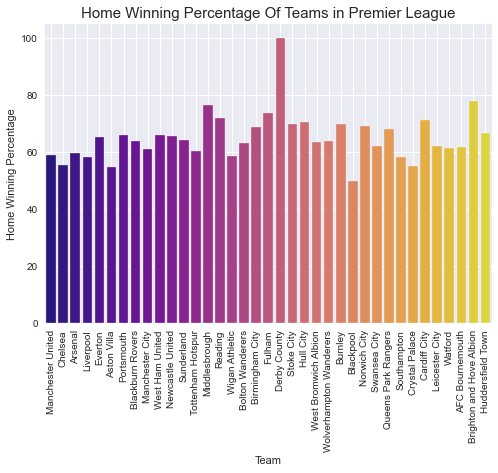

In [173]:
#Home winning percentage of different teams in epl
plt.title('Home Winning Percentage Of Teams in Premier League',fontsize = 15 )
sns.barplot(y= ha_df['Home Winning Percentage'], x = ha_df['Team'],palette='plasma')
plt.xticks(rotation=90)
plt.grid(True)

NOW CALCULATING TOTTENHAM HOTSPUR'S HOME/AWAY GOALS

In [67]:
GOALS_SCORED = []
HGOALS_SCORED = []
AGOALS_SCORED = []
for i in range(len(filtered_df)):
    line = filtered_df.loc[i]
    if line['HomeTeam'] ==totth_name:
        HGOALS_SCORED.append(line['FTHG'])
        GOALS_SCORED.append(line['FTHG'])
    else:
        AGOALS_SCORED.append(line['FTAG'])
        GOALS_SCORED.append(line['FTAG'])
    

In [68]:
#calculating home mean goal , Away mean goal and Total Mean goals
HGOAL_MEAN = np.array(HGOALS_SCORED).mean()
AGOAL_MEAN = np.array(AGOALS_SCORED).mean()
GOAL_MEAN =np.array(GOALS_SCORED).mean()

Text(0, 0.5, 'Count')

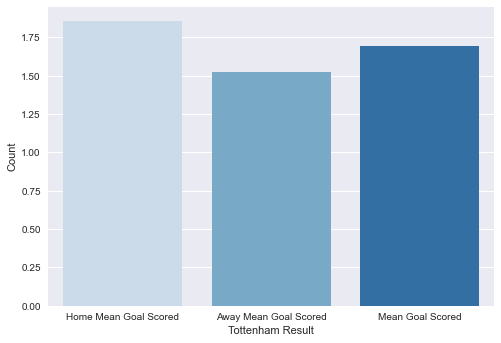

In [69]:
#plotting a bar graph which shoes Home Mean Goal Scored, Away Mean Goal Scored, Mean Goal Scored
plt.grid(True)
sns.barplot(x=['Home Mean Goal Scored', 'Away Mean Goal Scored', 'Mean Goal Scored'], y= [HGOAL_MEAN,AGOAL_MEAN,GOAL_MEAN],palette='Blues')
plt.xlabel('Tottenham Result')
plt.ylabel('Count')

In [70]:
print("Therefore, We can say that Tottenham have scored more goals at Home that at Away.") 

Therefore, We can say that Tottenham have scored more goals at Home that at Away.


Now, Lets check what is the goal percentage of other teams in EPL

In [71]:
#calculating Home team Goal percentage
def get_home_goal(team_name):
    filtered_df = pd.read_csv('/Users/akhil_kaundinya/DS/EPL/final_results_epl.csv')
    filtered_df = filtered_df[(filtered_df['HomeTeam'] == team_name) | (filtered_df['AwayTeam'] == team_name)]
    filtered_df = filtered_df.reset_index()
    HOME = filtered_df[filtered_df['HomeTeam']==team_name].index.tolist()
    H_A = []
    for i in range(len(filtered_df)):
        if i in HOME:
            H_A.append('Home')
        else:
            H_A.append('Away')
    filtered_df['HomeAway'] = H_A
    HGOALS_SCORED = []
    for i in range(len(filtered_df)):
        line = filtered_df.loc[i]
        if line['HomeTeam'] == team_name:
            HGOALS_SCORED.append(line['FTHG'])
        else:
            AGOALS_SCORED.append(line['FTAG'])

    return np.array(HGOALS_SCORED).mean()

In [72]:
home_goal=[]
for t in epl_team_list:
    home_goal.append(get_home_goal(t))

In [73]:
ha_df = pd.DataFrame({'Team' : epl_team_list, 'Team Mean Home Goal': home_goal})

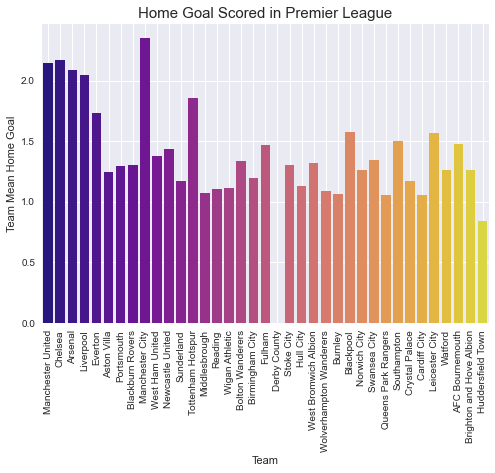

In [74]:
plt.title('Home Goal Scored in Premier League',fontsize = 15 )
sns.barplot(y= ha_df['Team Mean Home Goal'], x = ha_df['Team'],palette='plasma')
plt.xticks(rotation=90)
plt.grid(True)

# We can clearly see that Man City has highest Home Mean Goal Percentage

Text(0, 0.5, 'Density')

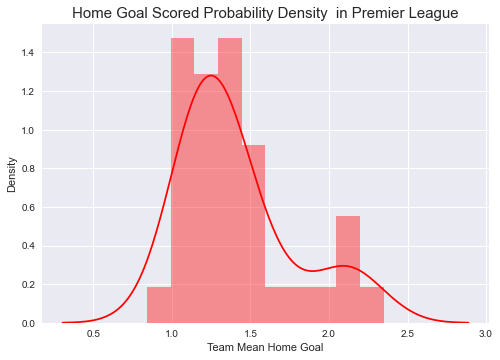

In [75]:
#Probablity Density plot of Home Goals Scored in Premier League
plt.title('Home Goal Scored Probability Density  in Premier League',fontsize = 15 )
plt.grid(True)
sns.distplot(ha_df['Team Mean Home Goal'],color='red',bins=10)
plt.ylabel('Density')

In [76]:
stat_v = ha_df[ha_df['Team Mean Home Goal']<1.75]
stat_v

Team  Team Mean Home Goal
4                    Everton             1.732057
5                Aston Villa             1.245614
6                 Portsmouth             1.298246
7           Blackburn Rovers             1.305263
9            West Ham United             1.378947
10          Newcastle United             1.432749
11                Sunderland             1.173684
13             Middlesbrough             1.070175
14                   Reading             1.105263
15            Wigan Athletic             1.114035
16          Bolton Wanderers             1.336842
17           Birmingham City             1.192982
18                    Fulham             1.466165
20                Stoke City             1.305263
21                 Hull City             1.126316
22      West Bromwich Albion             1.315789
23   Wolverhampton Wanderers             1.087719
24                   Burnley             1.065789
25                 Blackpool             1.578947
26              Norwich City             1.263158
27              Swansea City             1.345865
28       Queens Park Rangers             1.052632
29               Southampton             1.500000
30            Crystal Palace             1.168421
31              Cardiff City             1.052632
32            Leicester City             1.565789
33                   Watford             1.263158
34           AFC Bournemouth             1.473684
35  Brighton and Hove Albion             1.263158
36         Huddersfield Town             0.842105

In the Simillar process Lets calculate the percentage for away goals

In [77]:
def get_away_goal(team_name):
    filtered_df = pd.read_csv('/Users/akhil_kaundinya/DS/EPL/final_results_epl.csv')
    filtered_df = filtered_df[(filtered_df['HomeTeam'] == team_name) | (filtered_df['AwayTeam'] == team_name)]
    filtered_df = filtered_df.reset_index()
    HOME = filtered_df[filtered_df['HomeTeam']==team_name].index.tolist()
    H_A = []
    for i in range(len(filtered_df)):
        if i in HOME:
            H_A.append('Home')
        else:
            H_A.append('Away')
    filtered_df['HomeAway'] = H_A
    HGOALS_SCORED = []
    AGOALS_SCORED = []
    for i in range(len(filtered_df)):
        line = filtered_df.loc[i]
        if line['HomeTeam'] == team_name:
            HGOALS_SCORED.append(line['FTHG'])
        else:
            AGOALS_SCORED.append(line['FTAG'])

    return np.array(AGOALS_SCORED).mean()

In [78]:
away_goal=[]
for t in epl_team_list:
    away_goal.append(get_away_goal(t))

In [79]:
ha_df = pd.DataFrame({'Team' : epl_team_list, 'Team Mean Away Goal': away_goal})

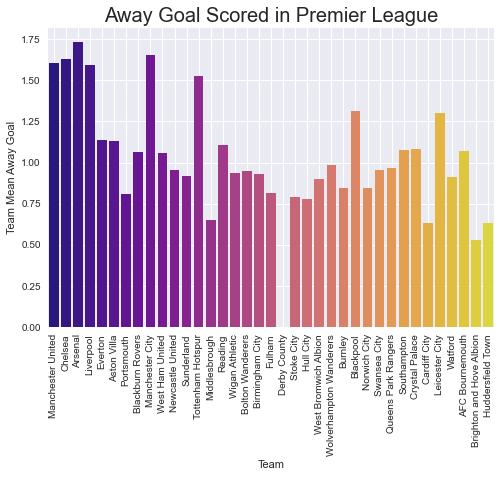

In [80]:
plt.title('Away Goal Scored in Premier League',fontsize = 20 )
sns.barplot(y= ha_df['Team Mean Away Goal'], x = ha_df['Team'],palette='plasma')
plt.xticks(rotation=90)
plt.grid(True)

# Time Series Analysis 

We are doing this for win/Loose and also for Scored goal/non scored goal

In this we are collecting points season by season to report the result and beahviour of the team 

In [81]:
#Based on result that is win , loose and draw
def point_counter(season_number):
    Team_season_data = filtered_df[filtered_df['Season']==all_epl_season[season_number]]
    Team_season_data = Team_season_data.reset_index()
    point = [0]
    for i in range(len(Team_season_data)):
        line = Team_season_data.loc[i] 
        if line['result']=='Loose':
            point.append(point[i])
        if line['result']=='Draw':
            point.append(point[i]+1)
        if line['result']=='Win':
            point.append(point[i]+3)
    point = np.array(point[1::])
    Team_season_data['Point'] = point
    return Team_season_data

In [82]:
SEASONS_TSS = []
for s in range(len(all_epl_season)):
    SEASONS_TSS.append(point_counter(s))

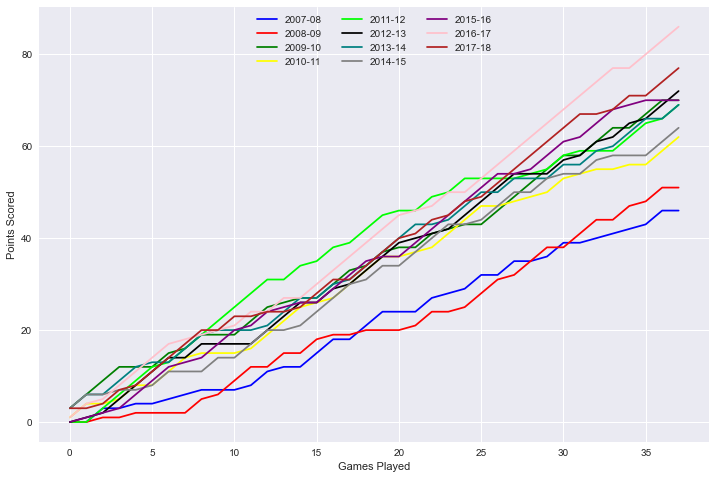

In [83]:
plt.figure(figsize=[12,8])
plt.grid(True)
plt.ylabel('Points Scored')
plt.xlabel('Games Played')
j=0
colors = ['blue','red','green','yellow','lime',
        'black','teal','grey','purple',
        'pink','firebrick','violet','gold']
for s in SEASONS_TSS:
    plt.plot(s.Point,label=all_epl_season[j],color=colors[j],)
    j=j+1
plt.legend(loc='upper center', frameon=False,ncol=3)

Therefore , we can see that the team performance is way too random in the middle of the season as they are not able to score or gather more points.





Now simillarly lets see what happens with goals

In [84]:
#based on goal scored vs goal not scored
def goal_counter(season_number):
    season_data = filtered_df[filtered_df['Season']==all_epl_season[season_number]]
    season_data = season_data.reset_index()
    goal = [0]
    for i in range(len(season_data)):
        line = season_data.loc[i] 
        if line['HomeTeam']==totth_name:
            goal.append(line['FTHG']+goal[i])
        else:
            goal.append(line['FTAG']+goal[i])
    goal = np.array(goal[1::])
    season_data['Goals'] = goal
    return season_data

In [85]:
SEASONS_TSS = []
for s in range(len(all_epl_season)):
    SEASONS_TSS.append(goal_counter(s))

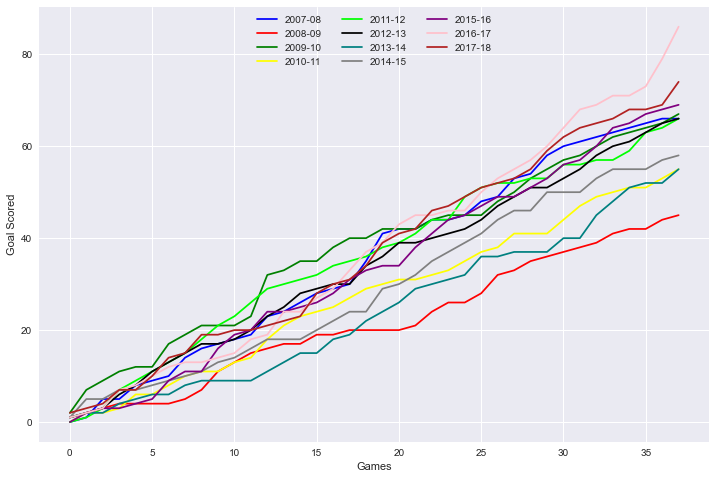

In [86]:
plt.figure(figsize=[12,8])
plt.grid(True)
plt.ylabel('Goal Scored')
plt.xlabel('Games')
j=0
colors = ['blue','red','green','yellow','lime',
        'black','teal','grey','purple',
        'pink','firebrick','violet','gold']
for s in SEASONS_TSS:
    plt.plot(s.Goals,label=all_epl_season[j],color=colors[j])
    j=j+1
plt.legend(loc='upper center', frameon=False,ncol=3)

Therefore , we can see that when it comes to goal scoring the team is not that random. The team is failry consistant when it comes to goal scoring 

# Correlation Matrix

In [87]:
filtered_df=pd.read_csv("final_results_epl.csv")

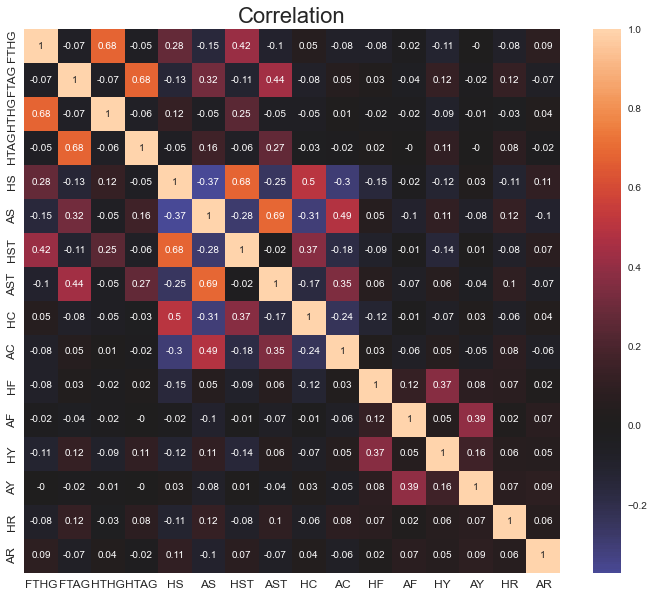

In [88]:
plt.figure(figsize=(12,10))
sns.heatmap(filtered_df.corr().round(2),xticklabels=filtered_df.corr().columns, yticklabels=filtered_df.corr().columns, center =0, annot=True)
plt.title("Correlation",fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Modeling

In [89]:
def winningScores(score):
    if score[0] > score[1]:
        return 1
    elif score[0] == score[1]:
        return 0
    else:
        return -1
    

In [90]:
#applying winning scores to table
filtered_df['Points'] = filtered_df[['FTHG', 'FTAG']].apply(winningScores, axis = 1)
filtered_df.head()

Season              DateTime          HomeTeam          AwayTeam  FTHG  \
0  2007-08  2007-08-11T00:00:00Z       Aston Villa         Liverpool     1   
1  2007-08  2007-08-11T00:00:00Z  Bolton Wanderers  Newcastle United     1   
2  2007-08  2007-08-11T00:00:00Z             Derby        Portsmouth     2   
3  2007-08  2007-08-11T00:00:00Z           Everton    Wigan Athletic     2   
4  2007-08  2007-08-11T00:00:00Z     Middlesbrough  Blackburn Rovers     1   

   FTAG FTR  HTHG  HTAG HTR  ...  AST    HC   AC    HF    AF   HY   AY   HR  \
0     2   A   0.0   1.0   A  ...  7.0   4.0  2.0  18.0  11.0  4.0  2.0  0.0   
1     3   A   0.0   3.0   A  ...  5.0   4.0  3.0  15.0  16.0  1.0  1.0  0.0   
2     2   D   1.0   1.0   D  ...  6.0   6.0  6.0  14.0  17.0  1.0  2.0  0.0   
3     1   H   1.0   0.0   H  ...  4.0   6.0  2.0   8.0  13.0  0.0  0.0  0.0   
4     2   A   1.0   0.0   H  ...  4.0  13.0  3.0  16.0  16.0  3.0  4.0  0.0   

    AR  Points  
0  0.0      -1  
1  0.0      -1  
2  0.0       0  
3  0.0       1  
4  0.0      -1  

[5 rows x 24 columns]

In [91]:
#Droping unwanted column
factors_to_drop = ['Season', 'DateTime', 'HomeTeam','AwayTeam','FTR','HTR','Referee','Points','FTHG','FTAG']
filtered_df_factors = filtered_df.drop(columns=factors_to_drop)
filtered_df_factors.head()

HTHG  HTAG    HS    AS  HST  AST    HC   AC    HF    AF   HY   AY   HR   AR
0   0.0   1.0  10.0  17.0  6.0  7.0   4.0  2.0  18.0  11.0  4.0  2.0  0.0  0.0
1   0.0   3.0  13.0   7.0  9.0  5.0   4.0  3.0  15.0  16.0  1.0  1.0  0.0  0.0
2   1.0   1.0  12.0  12.0  5.0  6.0   6.0  6.0  14.0  17.0  1.0  2.0  0.0  0.0
3   1.0   0.0  12.0  14.0  8.0  4.0   6.0  2.0   8.0  13.0  0.0  0.0  0.0  0.0
4   1.0   0.0  10.0   4.0  6.0  4.0  13.0  3.0  16.0  16.0  3.0  4.0  0.0  0.0

# RandomForest 

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

X = filtered_df_factors.values
y = filtered_df['Points'].values

RandomForest_model = RandomForestClassifier(n_estimators=500, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 42)

print(f'Shape of x train model: {X_train.shape}\n')

RandomForest_model.fit(X_train, y_train)

RandomForest_pred = RandomForest_model.predict(X_test) 

print(f'Accuracy of the Random Forest model: {round(accuracy_score(RandomForest_pred, y_test),5)}')

Shape of x train model: (3344, 14)

Accuracy of the Random Forest model: 0.6567


In [93]:
features = filtered_df_factors.columns

importances = RandomForest_model.feature_importances_
indices = np.argsort(importances)[::-1]

train_cols = X_train.shape[1]

print("Factors affecting the Wining result for a random forest model from most dependent to least:\n")

for f in range(train_cols):
    print(f'{features[indices[f]]:30s} {importances[indices[f]]:5f}')

Factors affecting the Wining result for a random forest model from most dependent to least:

HTHG                           0.111538
HTAG                           0.096017
HST                            0.095681
HS                             0.089706
AS                             0.088794
AST                            0.086558
AF                             0.080362
HF                             0.079877
HC                             0.074684
AC                             0.070787
AY                             0.054312
HY                             0.050925
HR                             0.010812
AR                             0.009946


In [94]:
y_pred = RandomForest_model.predict(X_test)
y_pred

array([ 1,  1, -1, -1,  0,  1,  0, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  0,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  0,  1,  1,  1,  1,  1,  0,  1,  0, -1, -1, -1,  1, -1,  1, -1,
        1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  0,  1,
       -1, -1,  1,  1, -1,  1,  0,  1,  0,  1, -1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  0,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  0,
        0, -1,  0,  1,  0, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1,
       -1,  1,  0, -1,  1,  1,  1,  1,  0,  1, -1,  1, -1, -1,  1,  0, -1,
        1, -1,  0, -1,  0, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,
        0, -1,  1,  0,  1,  0, -1, -1,  1,  1,  1,  1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1,  1,  1, -1,  1, -1,  0,  1,  1,  1,  1, -1,  1, -1,
        0,  1,  0,  1,  1, -1, -1, -1, -1,  0,  1,  1,  0, -1,  0, -1,  0,
        1,  1,  1,  1,  0, -1,  0, -1, -1,  1,  0, -1,  1, -1, -1,  1,  0,
        1,  1, -1,  0,  1

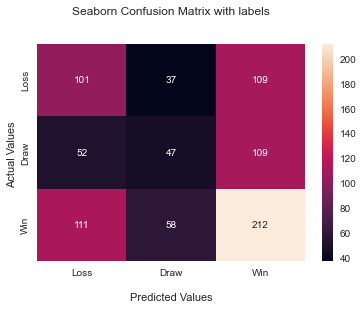

In [101]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Loss','Draw','Win'], columns=['Loss','Draw','Win'])

confusion = sns.heatmap(cm_df, annot=True, fmt='g')
confusion.set_title('Seaborn Confusion Matrix with labels\n\n');
confusion.set_xlabel('\nPredicted Values')
confusion.set_ylabel('Actual Values ');




plt.show();

# LogesticRegression

In [102]:
from sklearn.linear_model import LogisticRegression

X = filtered_df_factors.values
y = filtered_df['Points'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(X_train, y_train) 
y_pred_LogisticReg = LogisticRegression_model.predict(X_test) 

print(f'Logistic Regression Test Accuracy {accuracy_score(y_pred_LogisticReg, y_test)}')
print(f'\nConfusion Matrix Values:')
print(confusion_matrix(y_test, y_pred_LogisticReg)) 

Logistic Regression Test Accuracy 0.6339712918660287

Confusion Matrix Values:
[[161  44  42]
 [ 60  53  95]
 [ 22  43 316]]


In [103]:
print(classification_report(y_test, y_pred_LogisticReg))

              precision    recall  f1-score   support

          -1       0.66      0.65      0.66       247
           0       0.38      0.25      0.30       208
           1       0.70      0.83      0.76       381

    accuracy                           0.63       836
   macro avg       0.58      0.58      0.57       836
weighted avg       0.61      0.63      0.62       836



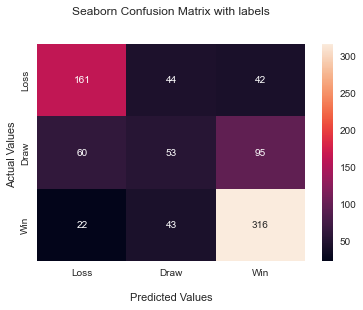

In [104]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
%matplotlib inline


cm = confusion_matrix(y_test, y_pred_LogisticReg)
cm_df = pd.DataFrame(cm, index=['Loss','Draw','Win'], columns=['Loss','Draw','Win'])

confusion = sns.heatmap(cm_df, annot=True, fmt='g')
confusion.set_title('Seaborn Confusion Matrix with labels\n\n');
confusion.set_xlabel('\nPredicted Values')
confusion.set_ylabel('Actual Values ');



plt.show();

In [105]:
filtered_df_hypothesis = filtered_df
filtered_df_hypothesis['home_win'] = [1 if i == 'H' else 0 for i in filtered_df_hypothesis['FTR']]

filtered_df_hypothesis['away_win'] = [1 if i == 'A' else 0 for i in filtered_df_hypothesis['FTR']]
filtered_df_hypothesis.head()

Season              DateTime          HomeTeam          AwayTeam  FTHG  \
0  2007-08  2007-08-11T00:00:00Z       Aston Villa         Liverpool     1   
1  2007-08  2007-08-11T00:00:00Z  Bolton Wanderers  Newcastle United     1   
2  2007-08  2007-08-11T00:00:00Z             Derby        Portsmouth     2   
3  2007-08  2007-08-11T00:00:00Z           Everton    Wigan Athletic     2   
4  2007-08  2007-08-11T00:00:00Z     Middlesbrough  Blackburn Rovers     1   

   FTAG FTR  HTHG  HTAG HTR  ...   AC    HF    AF   HY   AY   HR   AR  Points  \
0     2   A   0.0   1.0   A  ...  2.0  18.0  11.0  4.0  2.0  0.0  0.0      -1   
1     3   A   0.0   3.0   A  ...  3.0  15.0  16.0  1.0  1.0  0.0  0.0      -1   
2     2   D   1.0   1.0   D  ...  6.0  14.0  17.0  1.0  2.0  0.0  0.0       0   
3     1   H   1.0   0.0   H  ...  2.0   8.0  13.0  0.0  0.0  0.0  0.0       1   
4     2   A   1.0   0.0   H  ...  3.0  16.0  16.0  3.0  4.0  0.0  0.0      -1   

   home_win  away_win  
0         0         1  
1         0         1  
2         0         0  
3         1         0  
4         0         1  

[5 rows x 26 columns]

In [106]:
#filtering tottenham data from main
tottenham_df = filtered_df[(filtered_df['HomeTeam'] == totth_name) | (filtered_df['AwayTeam'] == totth_name)]
tottenham_df

Season              DateTime                  HomeTeam  \
5     2007-08  2007-08-11T00:00:00Z                Sunderland   
10    2007-08  2007-08-14T00:00:00Z         Tottenham Hotspur   
22    2007-08  2007-08-18T00:00:00Z         Tottenham Hotspur   
35    2007-08  2007-08-26T00:00:00Z         Manchester United   
38    2007-08  2007-09-01T00:00:00Z                    Fulham   
...       ...                   ...                       ...   
4134  2017-18  2018-04-17T00:00:00Z  Brighton and Hove Albion   
4153  2017-18  2018-04-30T00:00:00Z         Tottenham Hotspur   
4160  2017-18  2018-05-05T00:00:00Z      West Bromwich Albion   
4168  2017-18  2018-05-09T00:00:00Z         Tottenham Hotspur   
4178  2017-18  2018-05-13T00:00:00Z         Tottenham Hotspur   

               AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  ...    AC    HF  \
5     Tottenham Hotspur     1     0   H   0.0   0.0   D  ...   2.0  14.0   
10              Everton     1     3   A   1.0   3.0   A  ...   4.0  16.0   
22                Derby     4     0   H   3.0   0.0   H  ...   3.0   8.0   
35    Tottenham Hotspur     1     0   H   0.0   0.0   D  ...   4.0  15.0   
38    Tottenham Hotspur     3     3   D   1.0   2.0   A  ...  14.0  13.0   
...                 ...   ...   ...  ..   ...   ...  ..  ...   ...   ...   
4134  Tottenham Hotspur     1     1   D   0.0   0.0   D  ...   4.0   6.0   
4153            Watford     2     0   H   1.0   0.0   H  ...   0.0  11.0   
4160  Tottenham Hotspur     1     0   H   0.0   0.0   D  ...   9.0  13.0   
4168   Newcastle United     1     0   H   0.0   0.0   D  ...   4.0  10.0   
4178     Leicester City     5     4   H   1.0   2.0   A  ...   4.0   9.0   

        AF   HY   AY   HR   AR  Points  home_win  away_win  
5     14.0  1.0  1.0  0.0  0.0       1         1         0  
10     9.0  2.0  0.0  0.0  0.0      -1         0         1  
22    14.0  0.0  4.0  0.0  0.0       1         1         0  
35     7.0  2.0  3.0  0.0  0.0       1         1         0  
38    11.0  1.0  0.0  0.0  0.0       0         0         0  
...    ...  ...  ...  ...  ...     ...       ...       ...  
4134   5.0  1.0  0.0  0.0  0.0       0         0         0  
4153  10.0  1.0  0.0  0.0  0.0       1         1         0  
4160  12.0  4.0  1.0  0.0  0.0       1         1         0  
4168   8.0  2.0  3.0  0.0  0.0       1         1         0  
4178  13.0  1.0  2.0  0.0  0.0       1         1         0  

[418 rows x 26 columns]

# Hypothesis Testing
By definition, the alpha level is the probability of rejecting the null hypothesis when the null hypothesis is true.

Statistical difference in the odds of winning a game when a team is playing at Home
H0 (Null Hypothesis): There is no statistically significant difference in the odds of winning a game when a team is at playing at home vs when a team is playing away.

HA (Alternative Hypothesis): There is a statistically significant difference in the odds of winning a game when a team is playing at home vs. when a team is playing away.

HA : Mean Win Rate for the Home Team > Mean Win Rate for the Away Team
Considering the Alpha = 0.05

Applying T-Test since we wanted to measure the statistical difference between two samples.
T-Test Assumptions:
Data is collected randomly

Data is independent
Data is approximately normally distributed

In [107]:
tottenham_df.head()

Season              DateTime           HomeTeam           AwayTeam  FTHG  \
5   2007-08  2007-08-11T00:00:00Z         Sunderland  Tottenham Hotspur     1   
10  2007-08  2007-08-14T00:00:00Z  Tottenham Hotspur            Everton     1   
22  2007-08  2007-08-18T00:00:00Z  Tottenham Hotspur              Derby     4   
35  2007-08  2007-08-26T00:00:00Z  Manchester United  Tottenham Hotspur     1   
38  2007-08  2007-09-01T00:00:00Z             Fulham  Tottenham Hotspur     3   

    FTAG FTR  HTHG  HTAG HTR  ...    AC    HF    AF   HY   AY   HR   AR  \
5      0   H   0.0   0.0   D  ...   2.0  14.0  14.0  1.0  1.0  0.0  0.0   
10     3   A   1.0   3.0   A  ...   4.0  16.0   9.0  2.0  0.0  0.0  0.0   
22     0   H   3.0   0.0   H  ...   3.0   8.0  14.0  0.0  4.0  0.0  0.0   
35     0   H   0.0   0.0   D  ...   4.0  15.0   7.0  2.0  3.0  0.0  0.0   
38     3   D   1.0   2.0   A  ...  14.0  13.0  11.0  1.0  0.0  0.0  0.0   

    Points  home_win  away_win  
5        1         1         0  
10      -1         0         1  
22       1         1         0  
35       1         1         0  
38       0         0         0  

[5 rows x 26 columns]

In [108]:
#Calculating spurs home and Away wins
spurs_home_wins = np.array(tottenham_df['home_win'])
spurs_away_wins = np.array(tottenham_df['away_win'])
spurs_draw = np.array(tottenham_df['Points'] == 0)

total_matches = len(tottenham_df)
print(f'Total number of Matches played: {total_matches}')

Total number of Matches played: 418


In [109]:
n_home_win = np.array([i for i in spurs_home_wins if i == True])
n_away_win = np.array([i for i in spurs_away_wins if i == True])
n_draw = np.array([i for i in spurs_draw if i == True])

print(f'Total Home Team Win: {len(n_home_win)}')
print(f'Total Away Team Win: {len(n_away_win)}')
print(f'Total Draw: {len(n_draw)}')

Total Home Team Win: 194
Total Away Team Win: 121
Total Draw: 103


In [110]:
# Calculating Mean 
print(f'Home Team Win Mean: {spurs_home_wins.mean()}')
print(f'Away Team Win Mean: {spurs_away_wins.mean()}')
print(f'Draw Mean: {spurs_draw.mean()}')

Home Team Win Mean: 0.46411483253588515
Away Team Win Mean: 0.2894736842105263
Draw Mean: 0.24641148325358853


In [111]:
difference = spurs_home_wins.mean() - spurs_away_wins.mean()
print(f'Difference in the Win(Mean): {difference}')

Difference in the Win(Mean): 0.17464114832535882


In [112]:
spurs_home_win_variance = spurs_home_wins.var()
spurs_away_win_variance = spurs_away_wins.var()

print(f'Variance of the Home Team Win: {spurs_home_win_variance}')
print(f'Variance of the Away Team Win: {spurs_away_win_variance}')

Variance of the Home Team Win: 0.2487122547560724
Variance of the Away Team Win: 0.2056786703601108


# Cohen's d
Finding the Cohenn's d

In [125]:
spurs_combined_variance = ( total_matches*(spurs_home_win_variance + spurs_away_win_variance) / (total_matches)*2 )
cohens_d = difference / np.sqrt(spurs_combined_variance)
print(f'The Value of the Cohens d for spurs: {round(cohens_d,5)}')

The Value of the Cohens d for spurs: 0.1832


# Power Analysis 
calculating the estimated required sample size using power analysis

In [126]:
#Lets assume alpha = 0.05 and power = 0.95
from scipy import stats
from statsmodels.stats.power import TTestIndPower

effect = cohens_d

ratio = len(spurs_home_wins) / len(spurs_away_wins)

analysis = TTestIndPower()
result = analysis.solve_power(effect, power=0.95, ratio=ratio, alpha=0.05)
print(f"Therefore, The minimum sample size that has to be taken is: {round(result,2)}")

Therefore, The minimum sample size that has to be taken is: 775.36


In [127]:
# Using Bootstrapping to sample from the matches, specifying # of iterations & sample size of each iteration
sample_means_home = []

for i in range(800):
    sample_mean = np.random.choice(spurs_home_wins,size=202).mean()
    sample_means_home.append(sample_mean)
    
print(f'Length of the Sample Means Home: {len(sample_means_home)}')

sample_means_away = []

for i in range(800):
    sample_mean = np.random.choice(spurs_away_wins,size=202).mean()
    sample_means_away.append(sample_mean)
    
print(f'Length of the Sample Means Away: {len(sample_means_away)}')

Length of the Sample Means Home: 800
Length of the Sample Means Away: 800


In [128]:
# calculatating individual sample variances, pooled sample variance, and our t-statistic in a 2-sample T-test

# Computing the variance a list of values
def calc_spurs_variance(sample):
    sample_mean = np.mean(sample)
    return sum([(i - sample_mean)**2 for i in sample])


# Computing the pooled variance 2 lists of values, using the calc_variance function
def calc_spurs_sample_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var1, var2 = calc_spurs_variance(sample1), calc_spurs_variance(sample2)
    return (var1 + var2) / ((n_1 + n_2) - 2)


# Computes the 2-sample T-stat of 2 lists of values, using the calc_sample_variance function
def calc_spurs_twosample_tstatistic(expr, ctrl):
    expr_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    n_e, n_c = len(expr), len(ctrl)
    samp_var = calc_spurs_sample_variance(expr,ctrl)
    t = (expr_mean - ctrl_mean) / np.sqrt(samp_var * ((1/n_e)+(1/n_c)))
    return t

In [129]:
t_stat = calc_spurs_twosample_tstatistic(sample_means_home, sample_means_away)
print(f'T-Statistics measure value: {t_stat}')

T-Statistics measure value: 102.0673026335477


# Here t-score value is 103.63 and also this value indicates that the difference between two samples is 103.63

In [130]:
#Cross checking the value using test_ind
stats.ttest_ind(sample_means_home, sample_means_away)

Ttest_indResult(statistic=102.06730263354775, pvalue=0.0)

Therefore , the value is same

# lets see if can reject the null hypothesis or not by calculating p value

In [131]:
print(f'The p-value: {stats.ttest_ind(sample_means_home, sample_means_away).pvalue}')
print('As p value is less than alpha we can reject the null hypothesis value as the data is statisticaly significant')

The p-value: 0.0
As p value is less than alpha we can reject the null hypothesis value as the data is statisticaly significant


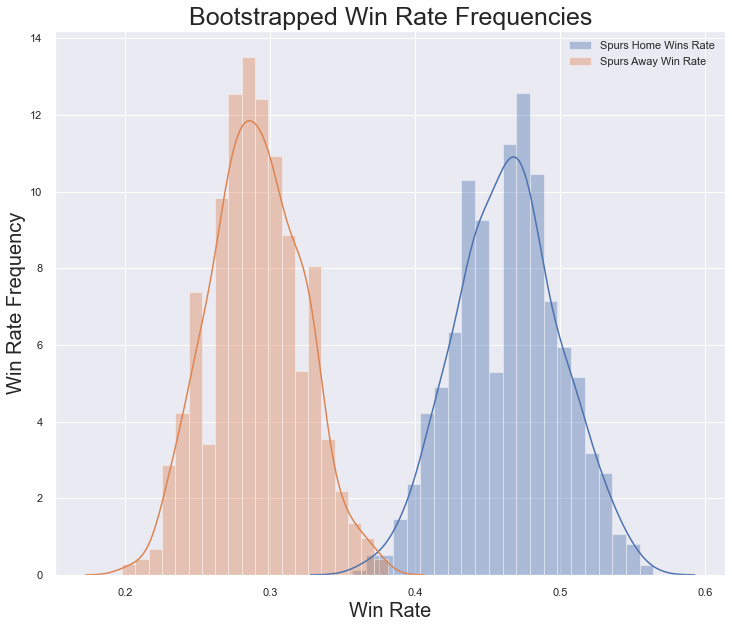

In [132]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
plt.title('Bootstrapped Win Rate Frequencies', fontsize='25')
plt.xlabel('Win Rate', fontsize='20')
plt.ylabel('Win Rate Frequency', fontsize='20')

sns.distplot(sample_means_home, label='Spurs Home Wins Rate') 
sns.distplot(sample_means_away, label='Spurs Away Win Rate')
plt.legend()
plt.show();

# We can clearly see the Home win percentage is more than Away win percentage .This clearly States the home advantage playes a mager role in the final outcome of the game.

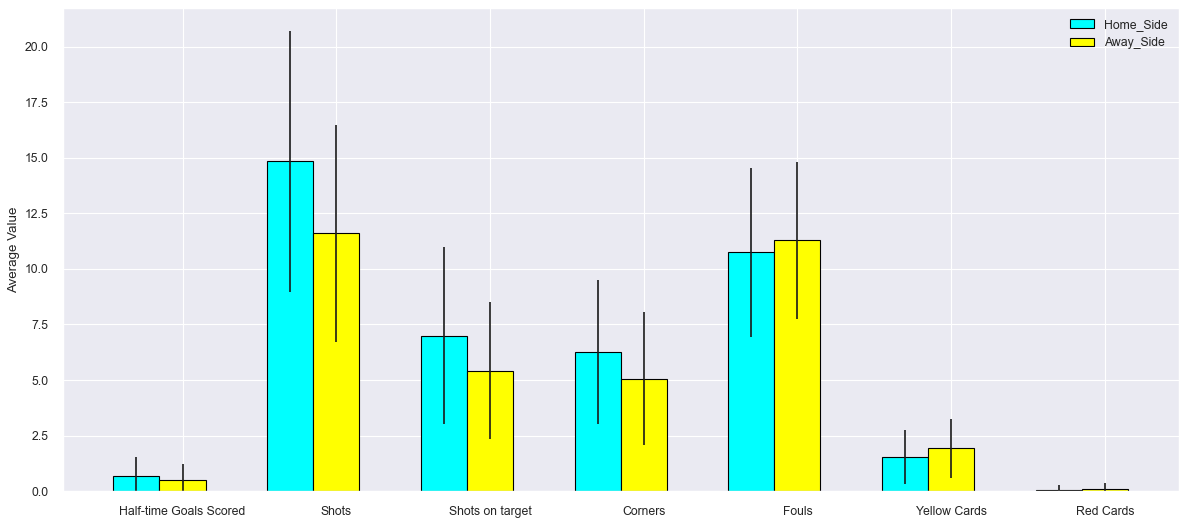

In [136]:
juststats= tottenham_df.iloc[:,2:24]
describe = (juststats.describe())

%matplotlib inline
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
barWidth = 0.3

bar1 = np.array(describe[1:2][([ 'HTHG', 'HS', 'HST', 'HC', 'HF', 'HY', 'HR'])]).flatten()
bar2 = np.array(describe[1:2][([ 'HTAG', 'AS', 'AST', 'AC', 'AF', 'AY', 'AR'])]).flatten()

yer1 = np.array(describe[2:3][(['HTHG', 'HS', 'HST', 'HC', 'HF', 'HY', 'HR'])]).flatten()
yer2 = np.array(describe[2:3][(['HTAG', 'AS', 'AST', 'AC', 'AF', 'AY', 'AR'])]).flatten()

r1 = np.arange(len(bar1.flatten()))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bar1, width = barWidth, color = 'Aqua', edgecolor = 'black', yerr=yer1, capsize=7, label='Home_Side')
plt.bar(r2, bar2, width = barWidth, color = 'Yellow', edgecolor = 'black', yerr=yer2, capsize=7, label='Away_Side')

plt.xticks([r + barWidth for r in range(len(bar1))], [ 'Half-time Goals Scored', 'Shots','Shots on target', 'Corners','Fouls','Yellow Cards','Red Cards'])
plt.ylabel('Average Value')
plt.ylim(0)
plt.legend()
plt.show();

In [134]:
filtered_df_mean_home = pd.DataFrame(filtered_df.groupby(['HomeTeam'])['home_win'].mean().sort_values(ascending=False))
filtered_df_mean_away = pd.DataFrame(filtered_df.groupby(['AwayTeam'])['away_win'].mean().sort_values(ascending=False))
filtered_df_mean = pd.merge(filtered_df_mean_home, filtered_df_mean_away, left_index=True, right_index=True)
filtered_df_mean.head(15)

home_win  away_win
Manchester United  0.746411  0.507177
Manchester City    0.722488  0.449761
Chelsea            0.674641  0.531100
Arsenal            0.669856  0.459330
Tottenham Hotspur  0.602871  0.406699
Liverpool          0.583732  0.440191
Everton            0.526316  0.287081
Leicester City     0.473684  0.289474
Fulham             0.428571  0.165414
Stoke City         0.426316  0.184211
Southampton        0.403509  0.289474
Newcastle United   0.403509  0.210526
West Ham United    0.400000  0.205263
Blackburn Rovers   0.389474  0.210526
Swansea City       0.383459  0.233083

In [135]:
champions = stats_epl.groupby('season').first()
champions

team  wins  losses  goals  total_yel_card  \
season                                                              
2007-2008  Manchester United  27.0     5.0   80.0            51.0   
2008-2009  Manchester United  28.0     4.0   68.0            61.0   
2009-2010            Chelsea  27.0     6.0  103.0            54.0   
2010-2011  Manchester United  23.0     4.0   78.0            56.0   
2011-2012    Manchester City  28.0     5.0   93.0            51.0   
2012-2013  Manchester United  28.0     5.0   86.0            57.0   
2013-2014    Manchester City  27.0     6.0  102.0            72.0   
2014-2015            Chelsea  26.0     3.0   73.0            73.0   
2015-2016     Leicester City  23.0     3.0   68.0            48.0   
2016-2017            Chelsea  30.0     5.0   85.0            72.0   
2017-2018    Manchester City  32.0     2.0  106.0            59.0   

           total_red_card  total_scoring_att  ontarget_scoring_att  \
season                                                               
2007-2008             2.0              696.0                 260.0   
2008-2009             5.0              715.0                 230.0   
2009-2010             5.0              834.0                 288.0   
2010-2011             3.0              618.0                 212.0   
2011-2012             5.0              738.0                 250.0   
2012-2013             1.0              561.0                 213.0   
2013-2014             1.0              673.0                 238.0   
2014-2015             4.0              564.0                 210.0   
2015-2016             3.0              522.0                 179.0   
2016-2017             0.0              580.0                 204.0   
2017-2018             2.0              665.0                 265.0   

           hit_woodwork  att_hd_goal  ...  corner_taken  touches  \
season                                ...                          
2007-2008          16.0         12.0  ...         261.0  26620.0   
2008-2009           9.0          7.0  ...         257.0  30077.0   
2009-2010          13.0         16.0  ...         286.0  28914.0   
2010-2011          15.0         18.0  ...         243.0  26671.0   
2011-2012          21.0         10.0  ...         269.0  28620.0   
2012-2013          24.0         14.0  ...         218.0  27264.0   
2013-2014          19.0         10.0  ...         283.0  28341.0   
2014-2015          15.0         10.0  ...         226.0  27861.0   
2015-2016          11.0         11.0  ...         197.0  21710.0   
2016-2017          17.0          8.0  ...         218.0  27658.0   
2017-2018          23.0         12.0  ...         284.0  35130.0   

           big_chance_missed  clearance_off_line  dispossessed  penalty_save  \
season                                                                         
2007-2008                NaN                10.0         627.0           0.0   
2008-2009                NaN                 3.0         579.0           0.0   
2009-2010                NaN                 3.0         503.0           1.0   
2010-2011               50.0                 2.0         471.0           0.0   
2011-2012               65.0                 6.0         480.0           1.0   
2012-2013               65.0                 5.0         506.0           0.0   
2013-2014               59.0                 0.0         411.0           0.0   
2014-2015               40.0                 2.0         476.0           0.0   
2015-2016               61.0                 7.0         366.0           0.0   
2016-2017               32.0                 3.0         436.0           0.0   
2017-2018               63.0                 4.0         406.0           2.0   

           total_high_claim  punches  draws  total_matches  
season                                                      
2007-2008              47.0     23.0    6.0           38.0  
2008-2009              56.0     22.0    6.0           38.0  
2009-2010              87.0     30.0    5.0  

# Conclusion 

Our Hypothesis testing has clearly shown that Home Advantage playes a major role in winning the league.From the above tables we can see that teams with more home win percentage(>70%) have won the the premier league most of the time from 2007-2018.

Therefore , For spurs to increase their chances of winning the premier league they have to focus on factors like shots on target,Corners, reducing number of fouls which will inturn increase their home win percentage which will lead to better position in points table. 